# Achmad Nur Bani Suta

## POSTTEST 5
NIM : 2209106016

### IMPORT LIBRARY

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### ANALISIS DATA

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.drop('customer_id', axis=1, inplace=True)

In [6]:
data.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### SUPERVISED LEARNING

SVM

In [7]:
from sklearn.preprocessing import MinMaxScaler # untuk Normalisasi data
from sklearn.preprocessing import StandardScaler # untuk standarisasi data
import numpy as np 

mms = MinMaxScaler()
ss = StandardScaler()

normalisasiData = mms.fit_transform(data[['churn']])
print(" Nilai scaling data : ", (normalisasiData))
standarisasiData = ss.fit_transform(data[['age', 'balance']])
print(" Nilai standar deviasi : ", np.std(standarisasiData))

 Nilai scaling data :  [[1.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]
 Nilai standar deviasi :  0.9999999999999999


In [8]:
from sklearn.model_selection import train_test_split

X = data[["age", "balance"]]
Y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
print("Dimensi X_train :", X_train.shape)
print("Dimensi X_test :", X_test.shape)
print("Dimensi Y_train :", y_train.shape)
print("Dimensi Y_test :", y_test.shape)

Dimensi X_train : (8000, 2)
Dimensi X_test : (2000, 2)
Dimensi Y_train : (8000,)
Dimensi Y_test : (2000,)


In [10]:
from sklearn.svm import SVC

svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [11]:
y_pred = svm.predict(X_test)
sv = svm.support_vectors_

HASIL PREDIKSI

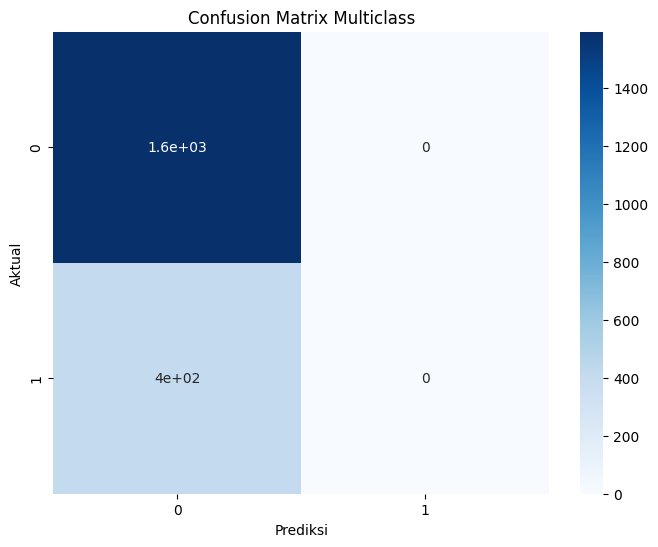

In [23]:
from sklearn.metrics import confusion_matrix

confussion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confussion, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Multiclass')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

HASIL PLOT

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

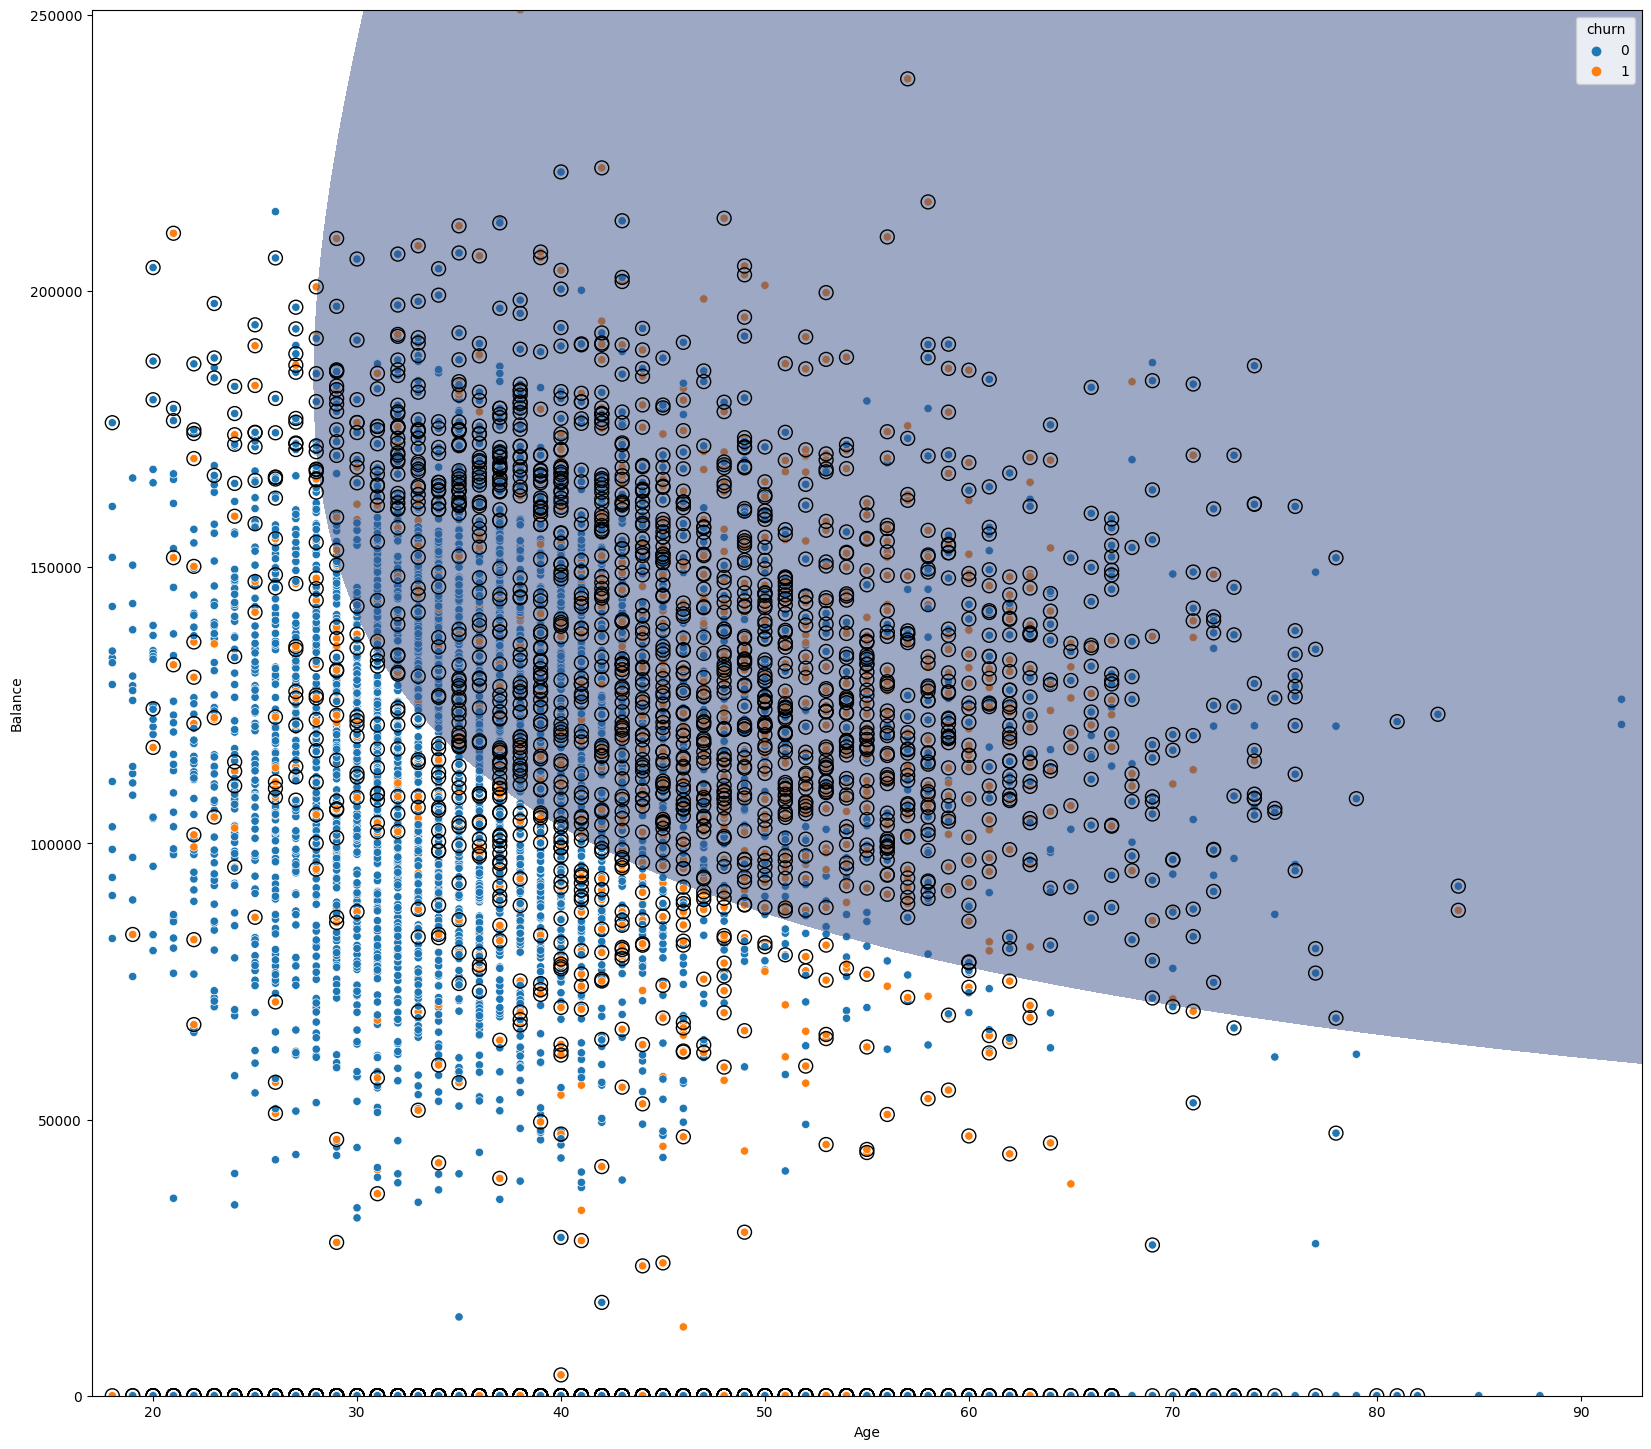

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(20, 18))
sns.scatterplot(x='age', y='balance', hue='churn', data=data)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

### UNSUPERVISED LEARNING

KMEANS

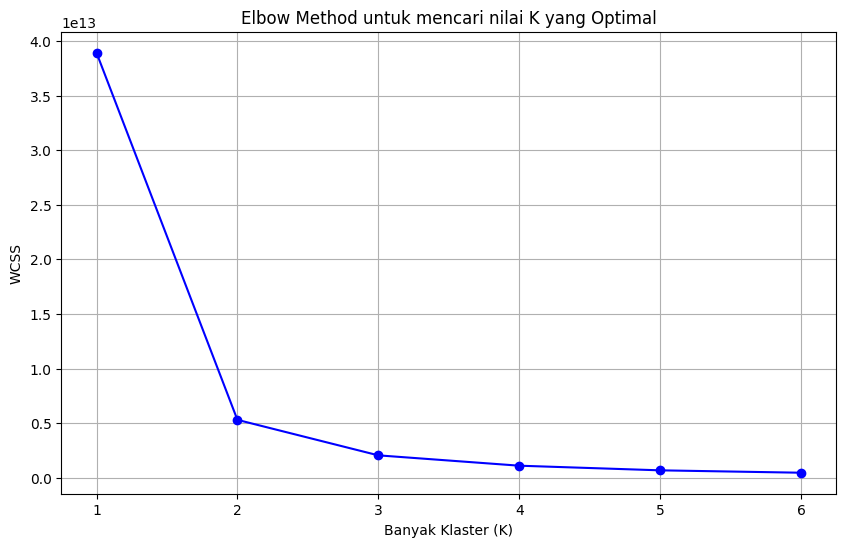

In [15]:
from sklearn.cluster import KMeans

wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

# Buat grafik Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init = 'auto')

In [17]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [18]:
data['cluster'] = kmeans.labels_
centroid = kmeans.cluster_centers_

centroid

array([[3.91954208e+01, 1.21869062e+05],
       [3.84749868e+01, 2.37676889e+03]])

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

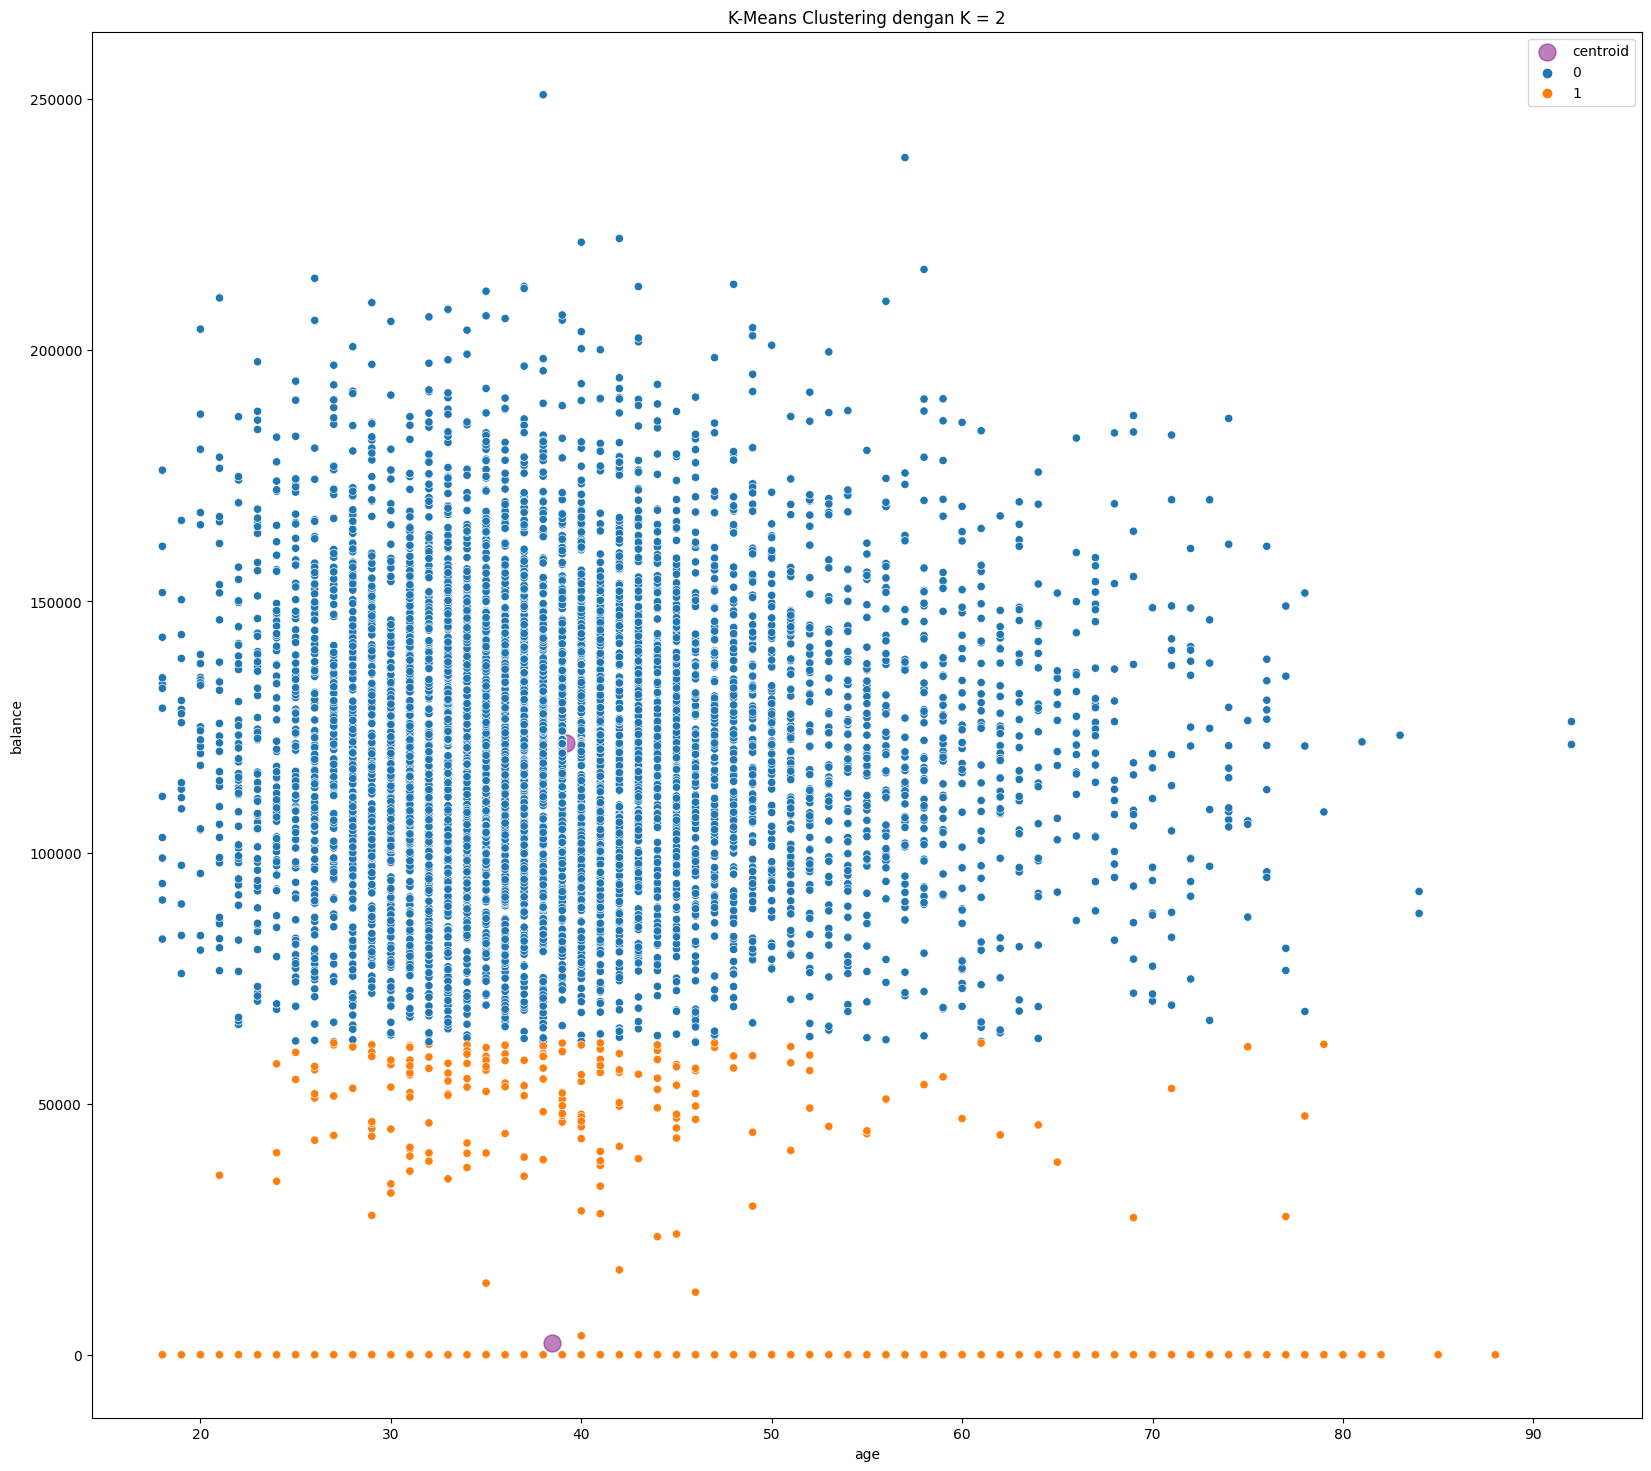

In [19]:
plt.figure(figsize = (20, 18 ))

# Data Points Pusat (Centroid)
plt.scatter(centroid[:, 0], centroid[:, 1], 
            alpha = 0.5, c = 'purple', s = 150, label = 'centroid')

# Data Points Hasil Prediksi Cluster
sns.scatterplot(data = data, x = 'age', y = 'balance',
                hue = 'cluster')
plt.title("K-Means Clustering dengan K = 2")
plt.legend(loc = 'upper right')

plt.show()

TANPA LABEL

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.80
Davies-Bouldin Index: 0.23
Calinski-Harabasz Index: 63478.41


MENGGUNAKAN LABEL ASLI

In [21]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

cross_tab = pd.crosstab(data["cluster"], data["churn"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(data["churn"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

true_labels_num = data["churn"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

homogeneity = homogeneity_score(data["churn"], kmeans.labels_)
completeness = completeness_score(data["churn"], kmeans.labels_)
v_measure = v_measure_score(data["churn"], kmeans.labels_)
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
churn       0     1
cluster            
0        4708  1489
1        3255   548 

Adjusted Rand Index (ARI)           : -0.02
Normalized Mutual Information (NMI) : 0.01
Homogeneity Score                   : 0.01
Completeness Score                  : 0.01
V-Measure Score                     : 0.01


HASIL PLOT

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

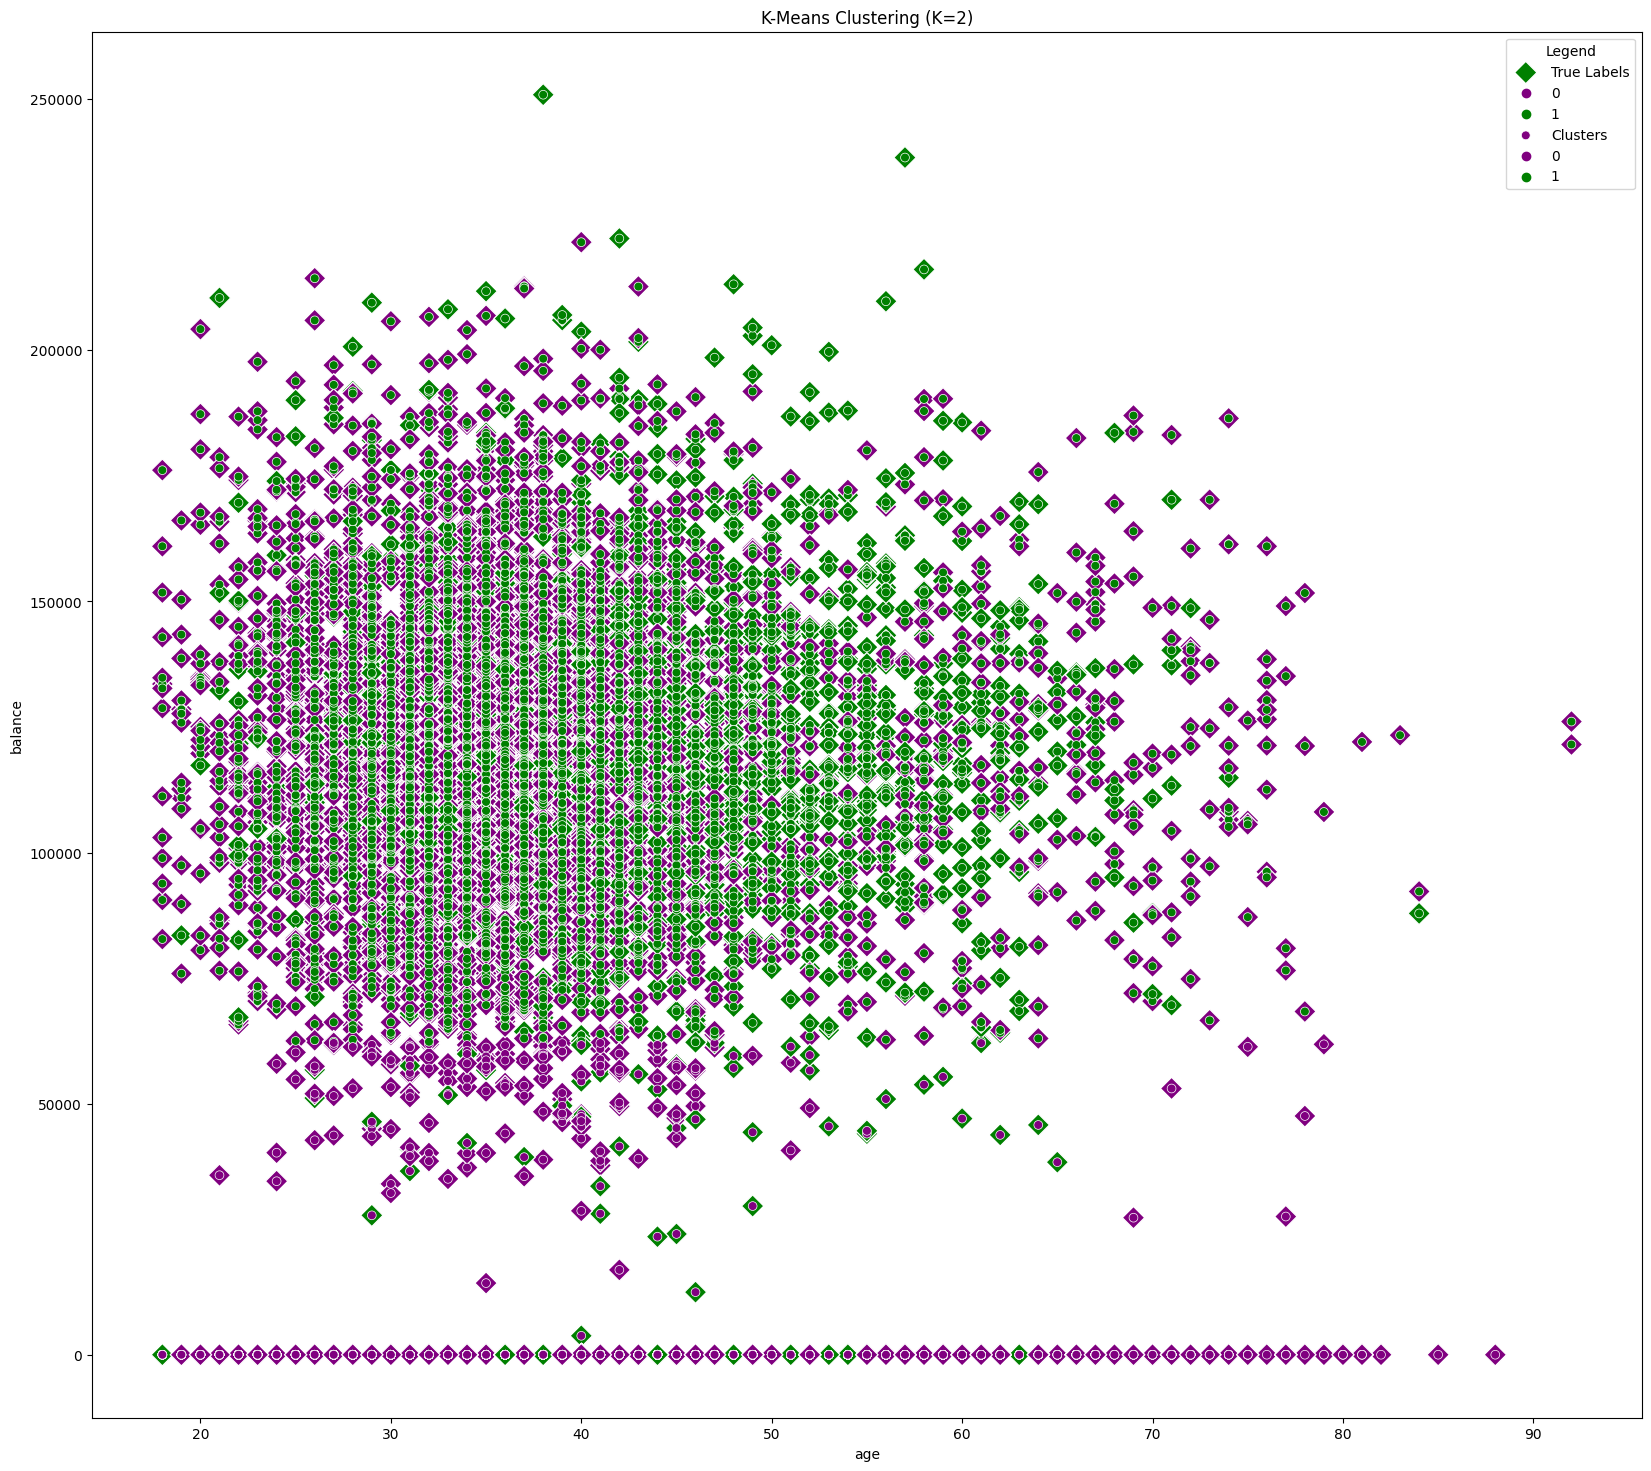

In [22]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut

cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2

# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
data["cluster2"] = data["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(data, x="age", y="balance", palette=warna,
hue="churn", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(data, x="age", y="balance", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.legend(title="Legend", loc="upper right")
plt.show()

# 